<a href="https://colab.research.google.com/github/seominjae1/ai-class/blob/main/ai_class_week1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/diabetes.csv", index_col=0)
#데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [2]:
X=df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [3]:
y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


In [4]:
#원 핫 인코딩

Y=pd.get_dummies(df['Outcome'])
Y

,0,1
Pregnancies,,
6,False,True
1,True,False
8,False,True
1,True,False
0,False,True
...,...,...
10,True,False
2,True,False
5,True,False


In [5]:
import tensorflow as tf
# TensorFlow 버전 확인
print("TensorFlow version:", tf.__version__)

# Keras 버전 확인
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=0)


In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 정의
model = Sequential()
# 7개의 특성
model.add(Dense(10, input_shape=(7,), activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(6, activation="tanh"))
model.add(Dense(2, activation="softmax"))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236 (944.00 B)

 Trainable params: 236 (944.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))
y_pred=model.predict(X_test)

y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3627 - loss: 0.9382 - val_accuracy: 0.6429 - val_loss: 0.6791
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5776 - loss: 0.6756 - val_accuracy: 0.6948 - val_loss: 0.6225
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.6536 - val_accuracy: 0.6948 - val_loss: 0.6055
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 0.6443 - val_accuracy: 0.7013 - val_loss: 0.6024
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6445 - val_accuracy: 0.7013 - val_loss: 0.5852
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.6350 - val_accuracy: 0.7013 - val_loss: 0.5908
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 0.6173 - val_accuracy: 0.6883 - val_loss: 0.5912
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6029 - loss: 0.6343 - val_accuracy: 0.7013 - val_loss:

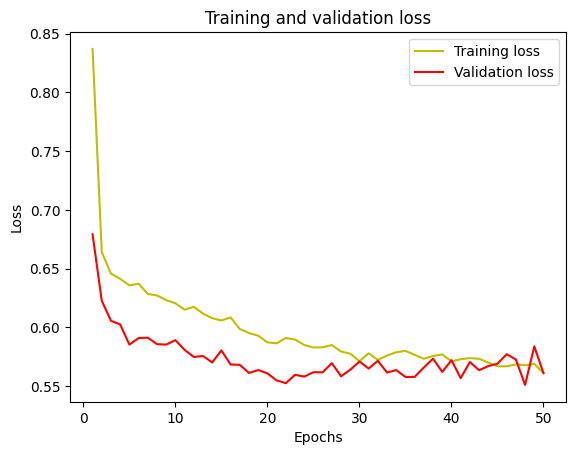

In [15]:
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs=range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

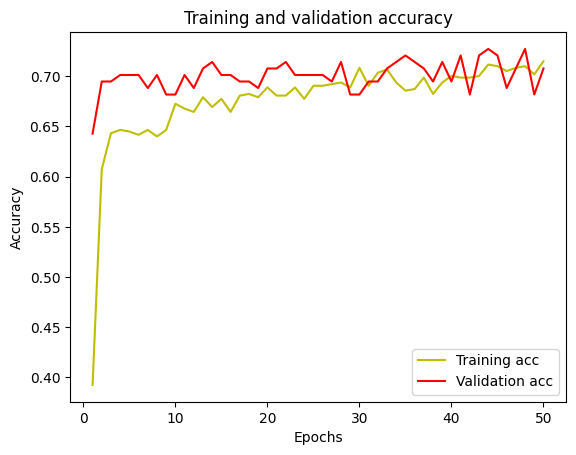

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       107
           1       0.53      0.34      0.42        47

    accuracy                           0.71       154
   macro avg       0.64      0.60      0.61       154
weighted avg       0.68      0.71      0.69       154

[[93 14]
 [31 16]]
